In [1]:
#WORKING
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp
import seaborn as sns
import pandas as pd
import spectral
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import concurrent.futures
import multiprocessing as mp
from lib_hyperspec import *

/home/royabhinav/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(3, 2592, 4608)


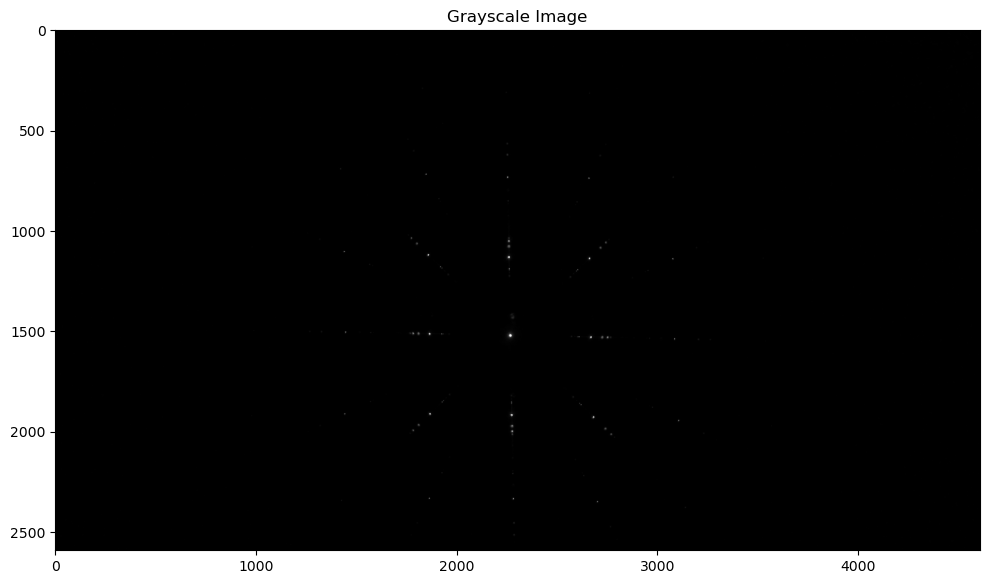

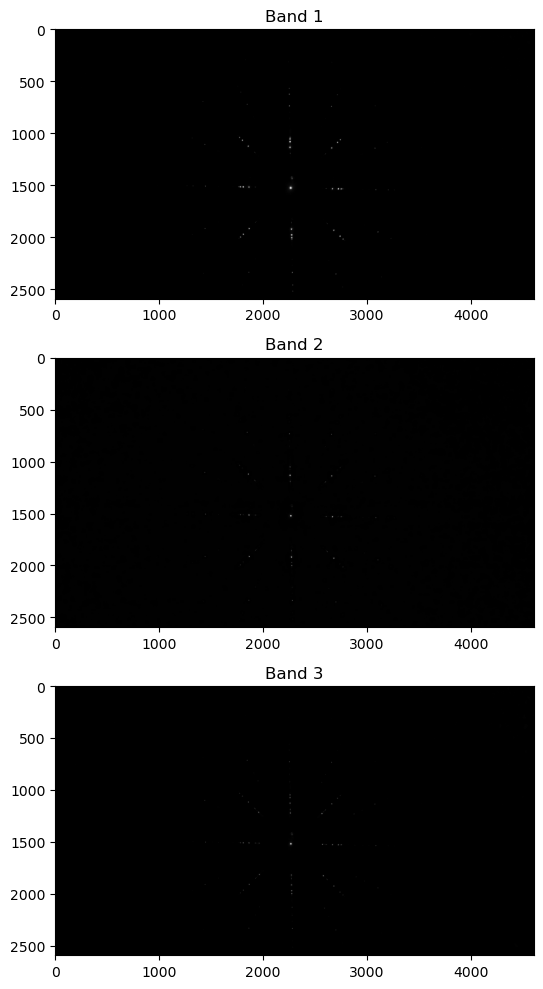

In [2]:
#IMAGE PLOTTING
filename = 'jan24he1'
path_to_file = f'/home/royabhinav/Desktop/CTIS/Data/data_jan24'
img_path  = path_to_file+'/'+filename+'.tif'

# Open the file
with rasterio.open(img_path) as src:
    # Read the .tif image file as a 2D array
    image = src.read()

print(image.shape)

plot_img(image)

Base points:  [2018.61857768 1683.33836053 2350.68138813 2187.64434432 2852.75022151
 2521.84774006]


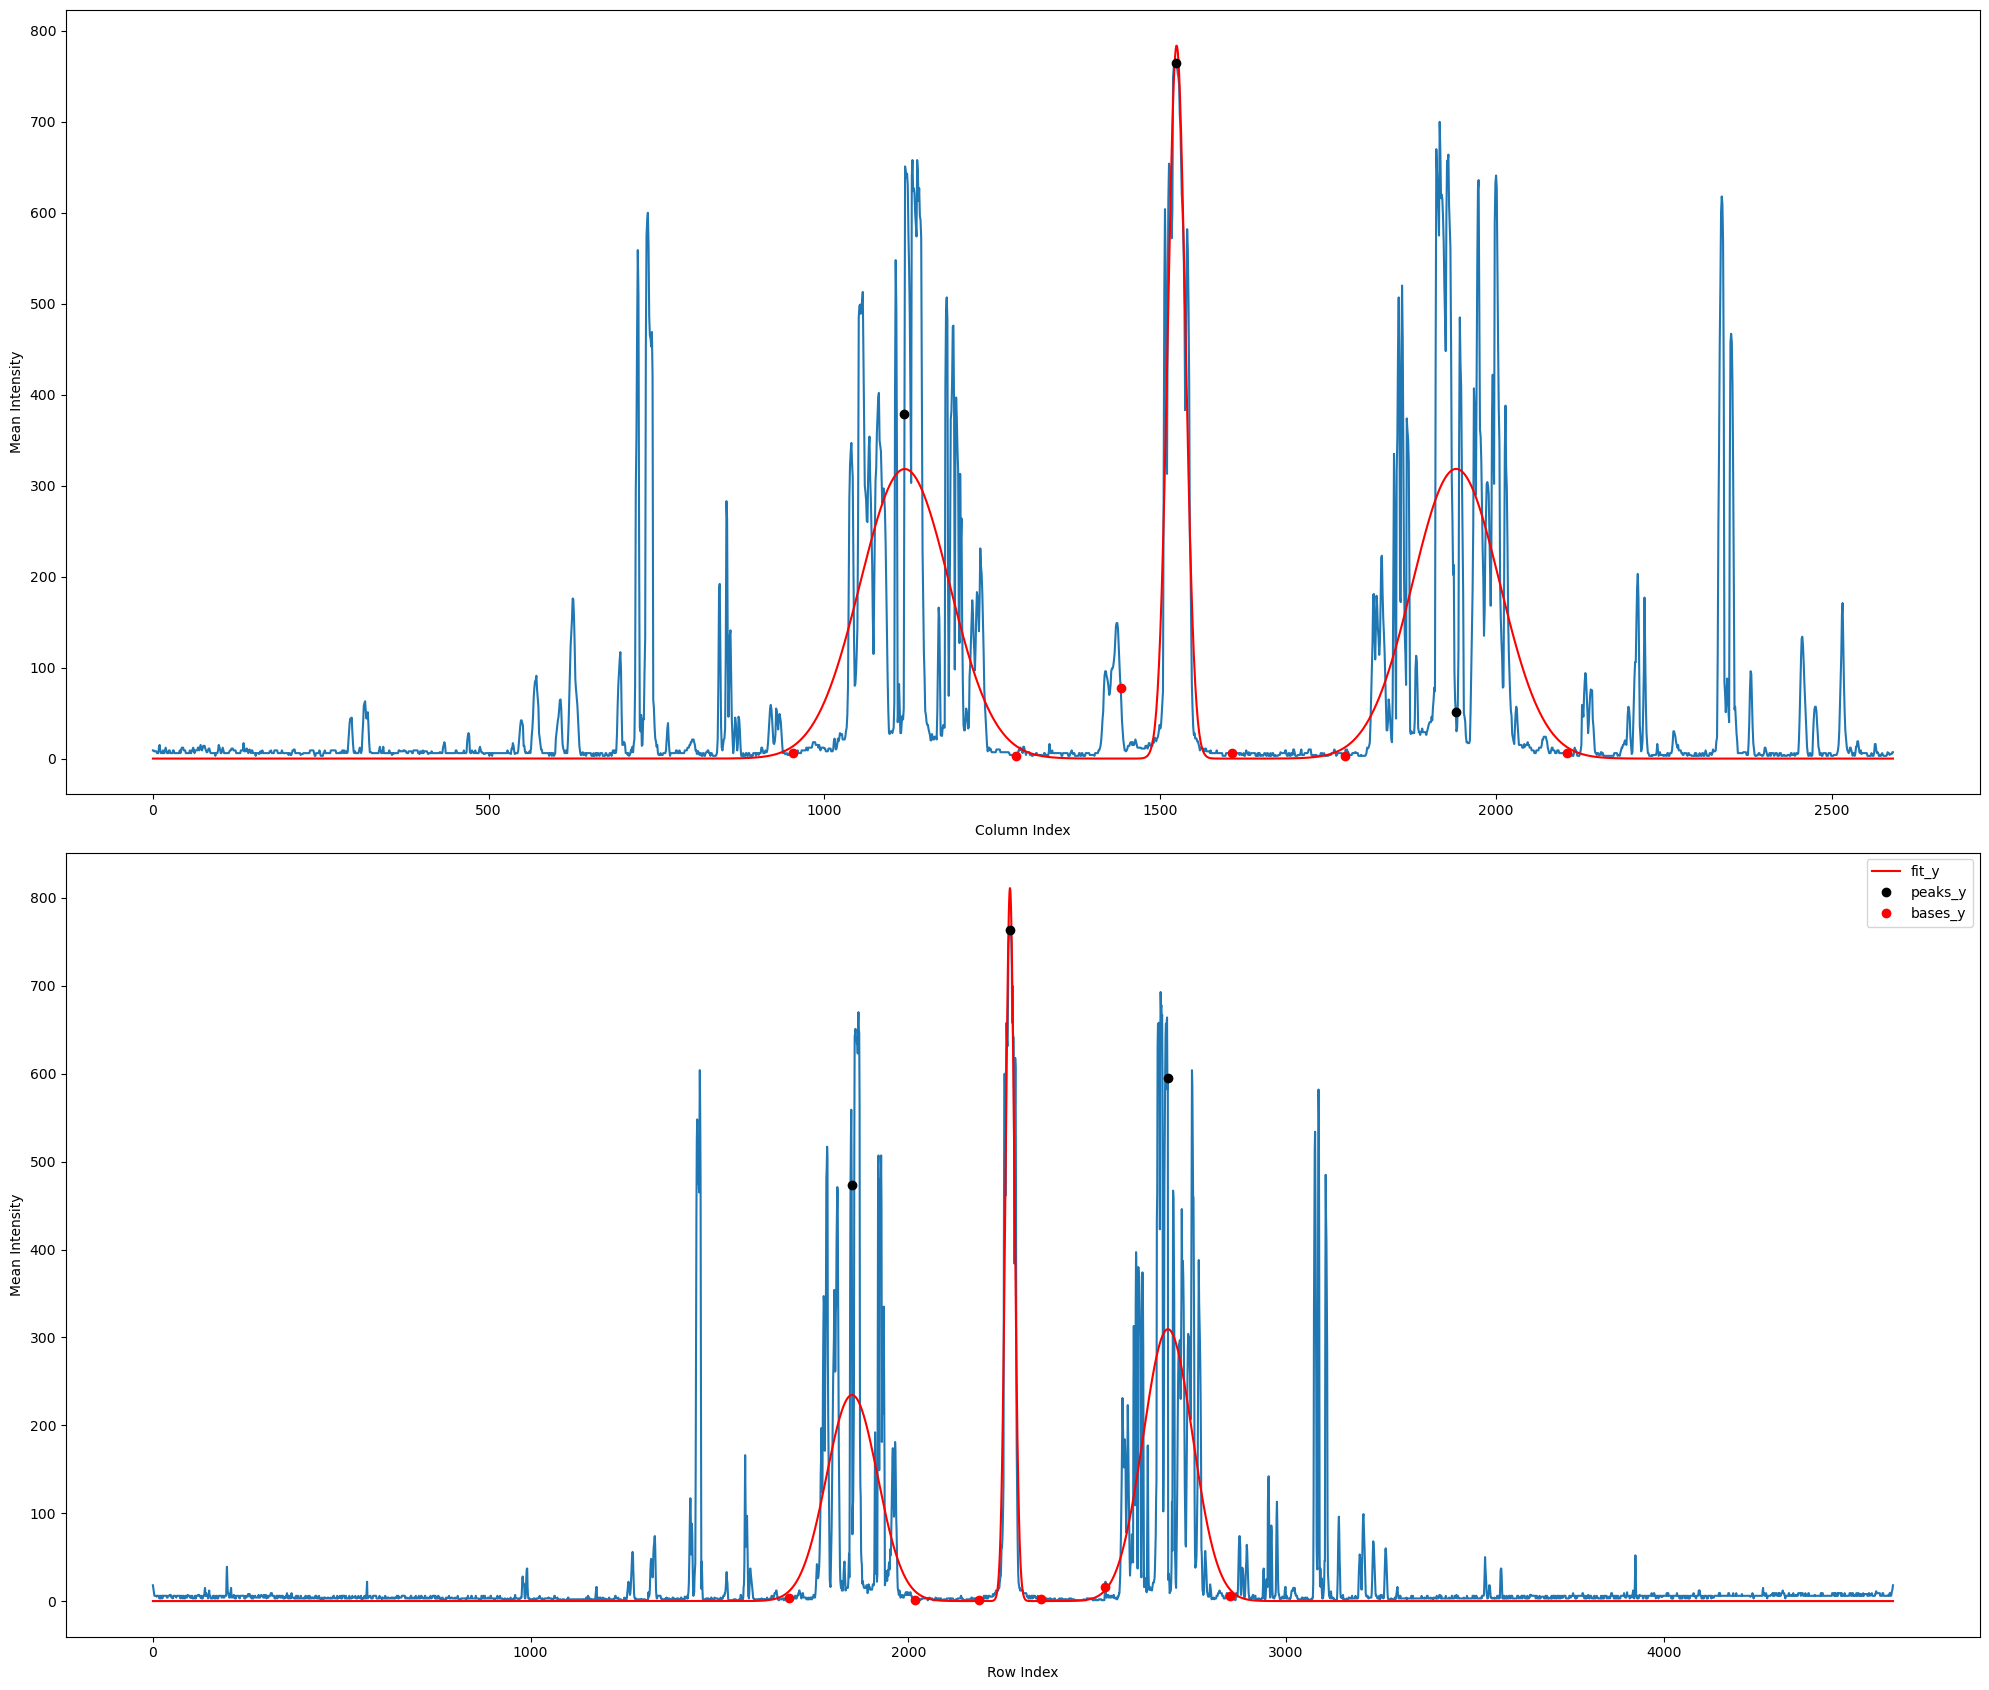

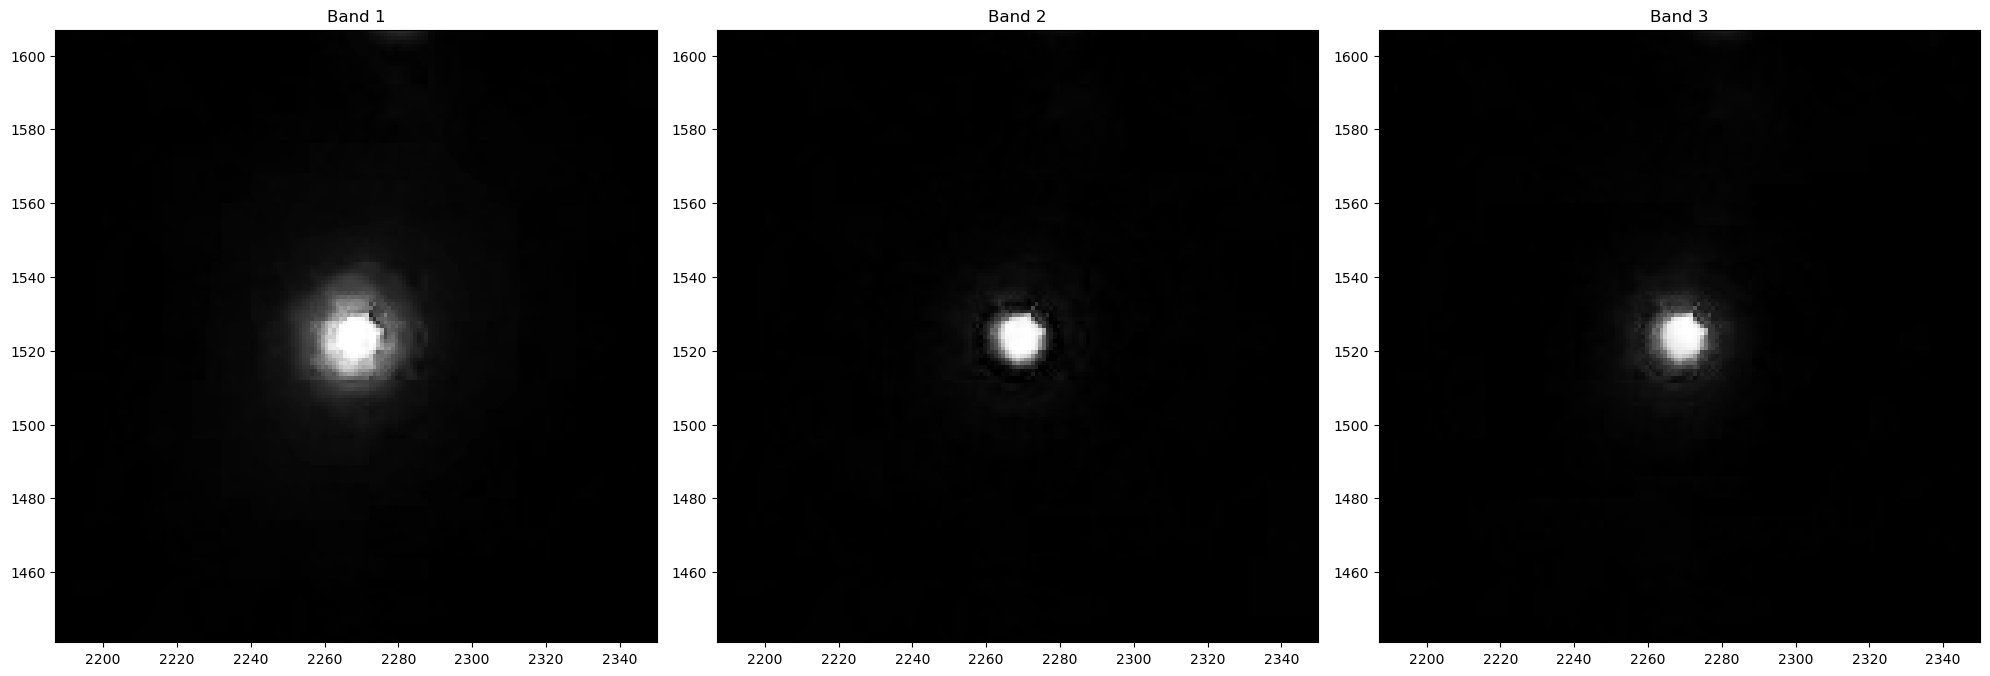

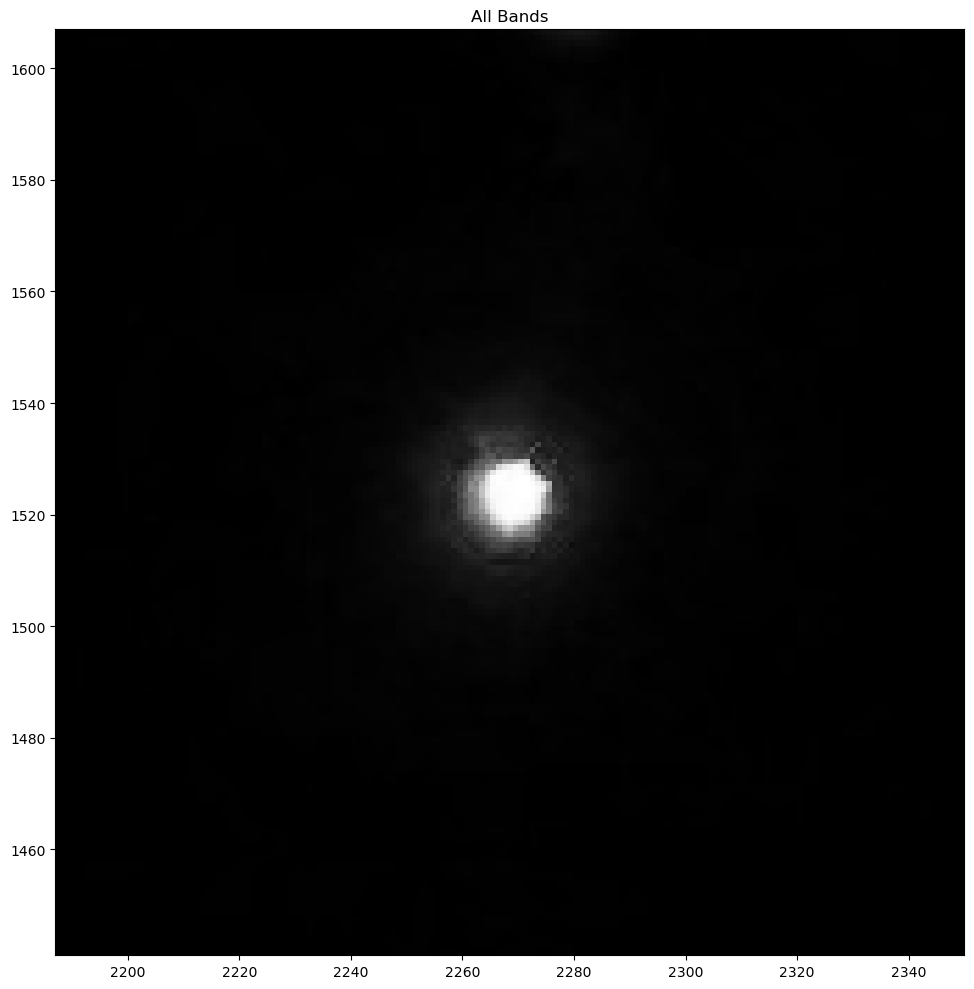

In [3]:
#EXTRACTING IMAGE REGIONS

# Initial guess for the parameters
initial_guess_col = [30, 1100, 50, 100, 1500, 50, 30, 1700, 50]

# Initial guess for the parameters
initial_guess_row = [30, 1700, 100, 150, 2200, 100, 30, 2700, 100]

# Extract the regions
region_1, region_2, region_3, region_4, central_region = get_regions(image, initial_guess_col, initial_guess_row)

center_y, center_x = plot_region_3(central_region, image)

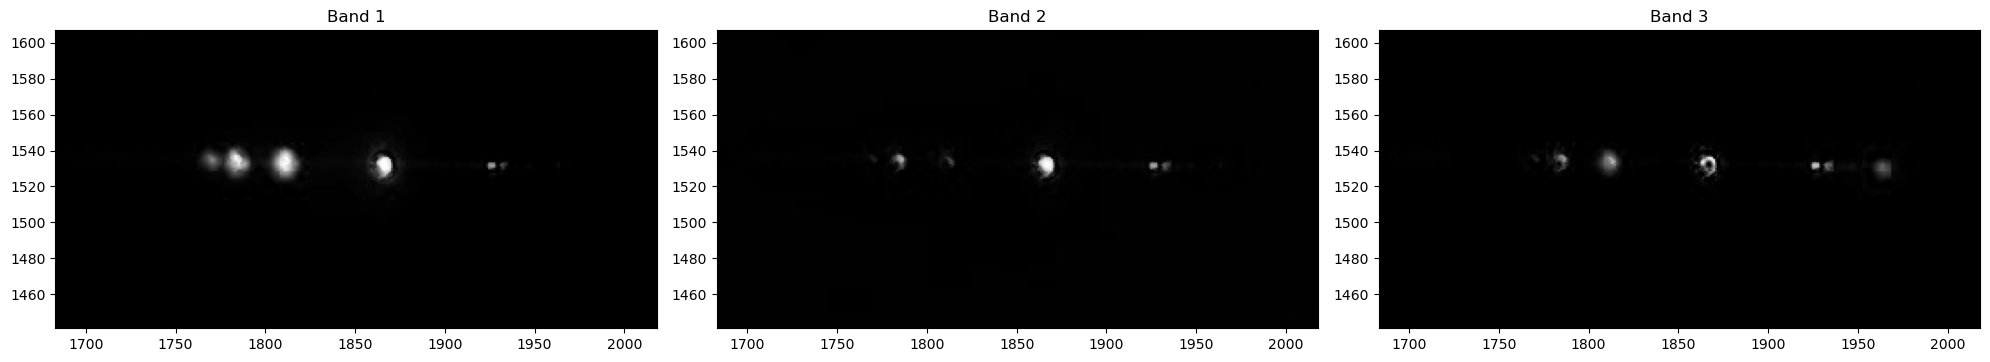

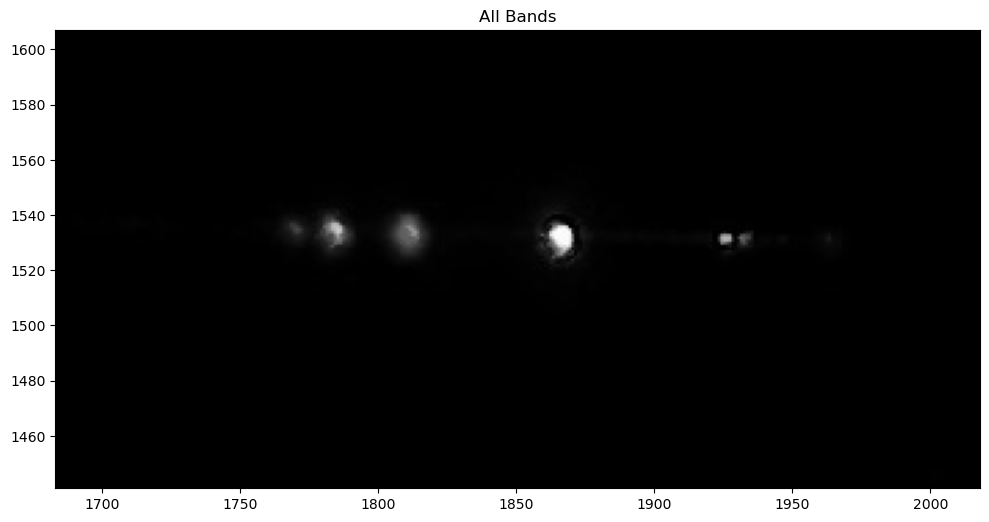

Detected Peaks:
Pixel Position: 1770, Intensity: 453.47265625
Pixel Position: 1785, Intensity: 1482.8284912109375
Pixel Position: 1811, Intensity: 1329.3388671875
Pixel Position: 1866, Intensity: 2472.015380859375
Pixel Position: 1925, Intensity: 684.2958984375
Pixel Position: 1932, Intensity: 442.5358581542969
Pixel Position: 1963, Intensity: 206.84458923339844
7


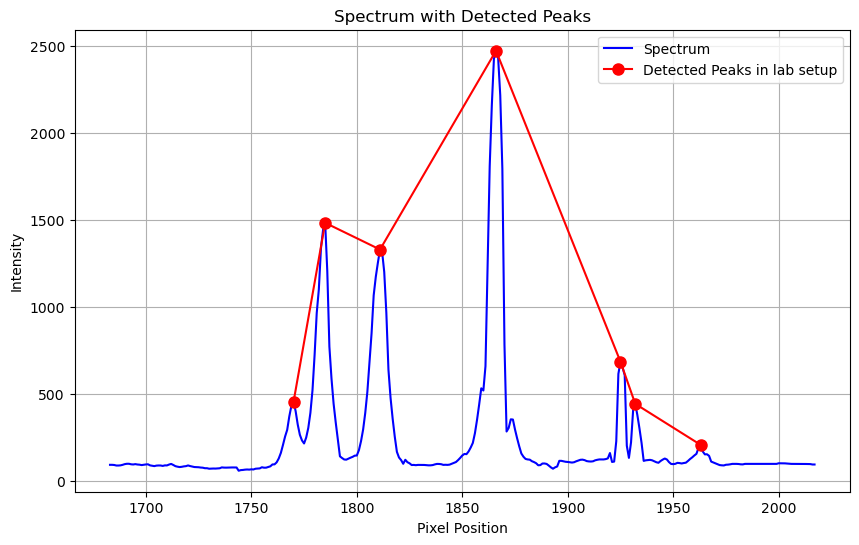

In [4]:
peaks_1 = plot_region_1(region_1, image)


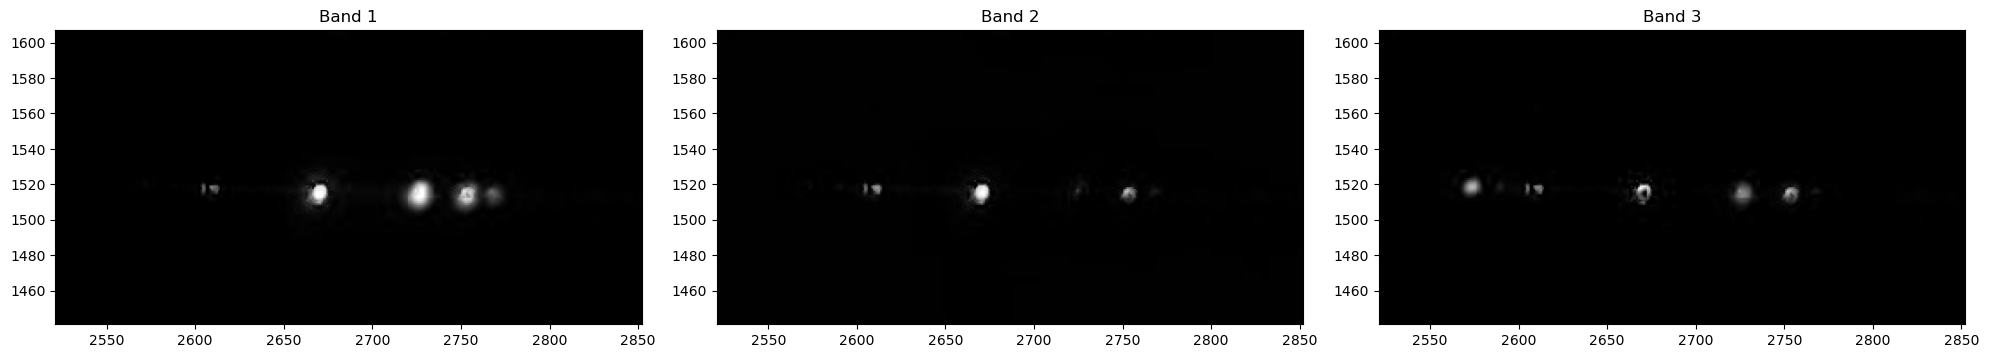

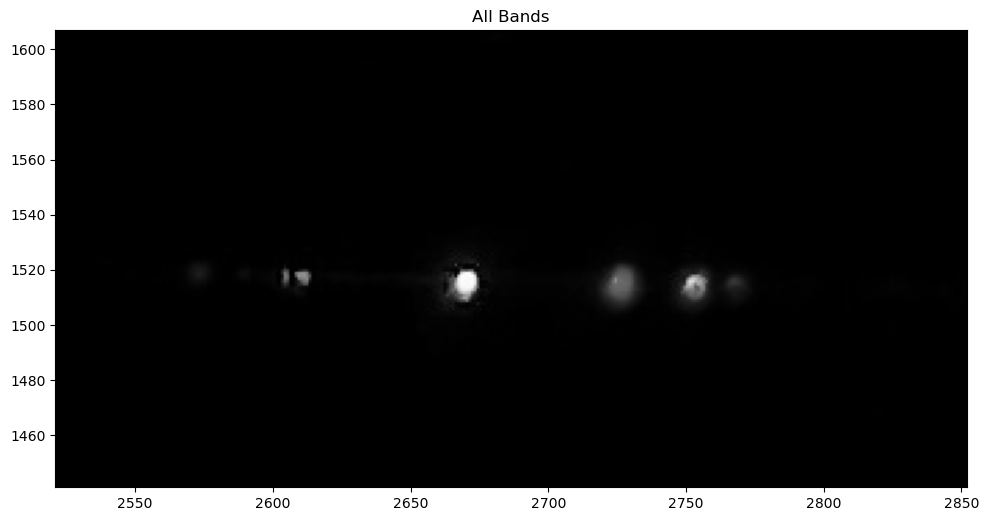

Detected Peaks:
Pixel Position: 2573, Intensity: 259.4083251953125
Pixel Position: 2604, Intensity: 667.3615112304688
Pixel Position: 2611, Intensity: 719.5885620117188
Pixel Position: 2670, Intensity: 2400.31689453125
Pixel Position: 2726, Intensity: 1278.9754638671875
Pixel Position: 2752, Intensity: 1445.6712646484375
Pixel Position: 2767, Intensity: 387.93841552734375
7


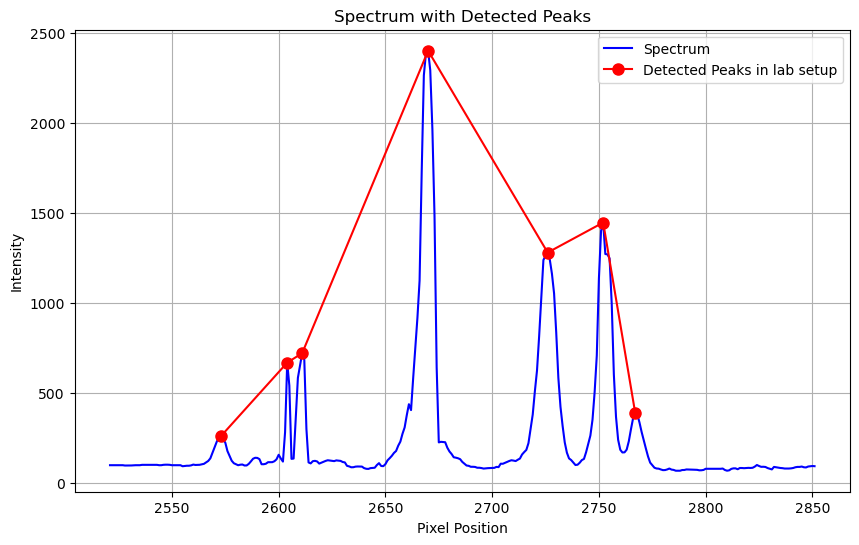

In [5]:
peaks_2 = plot_region_1(region_2, image)

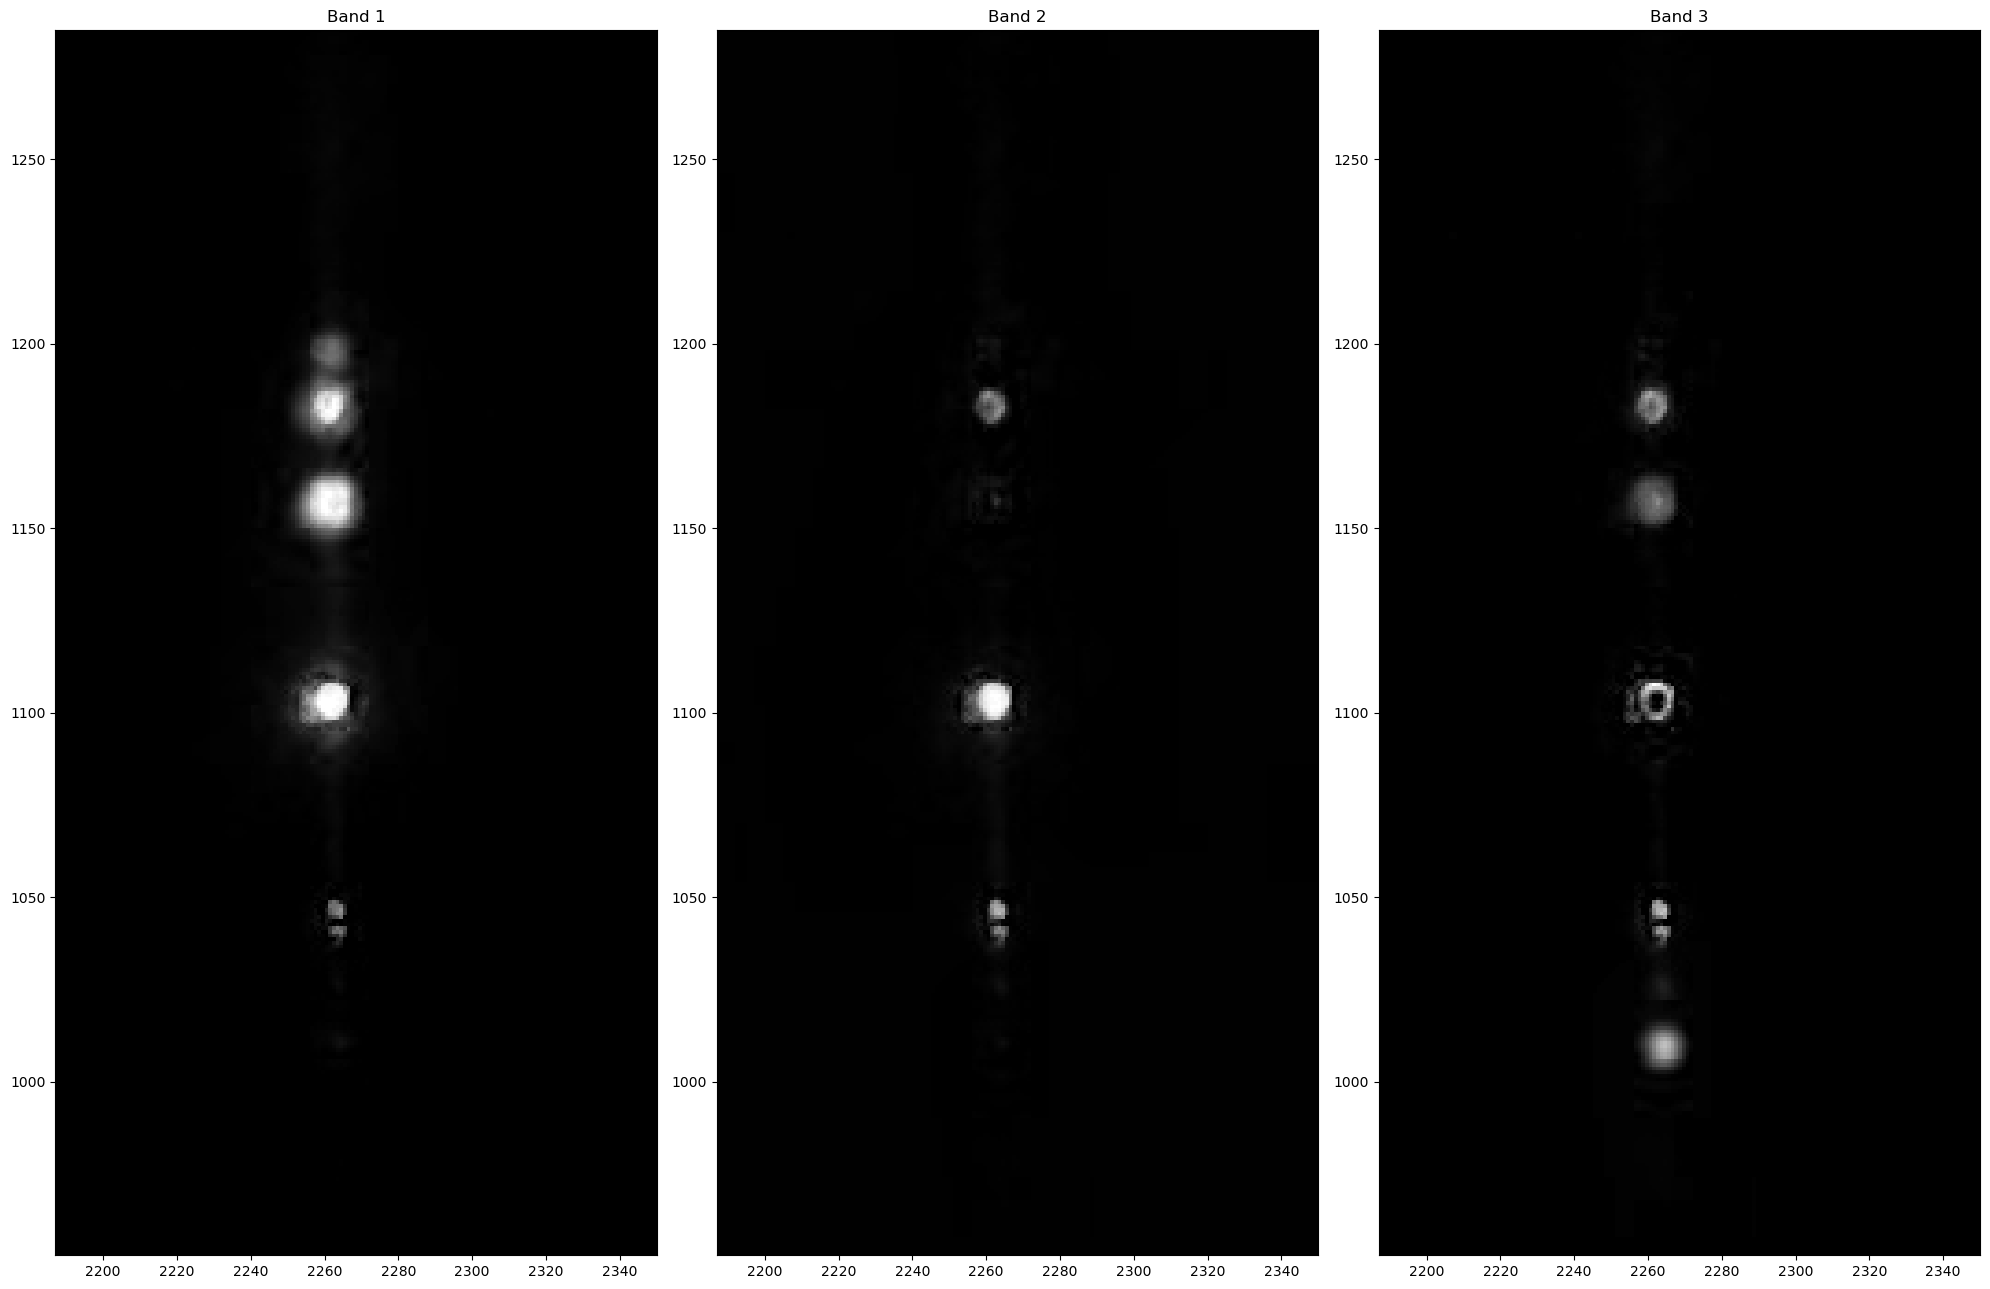

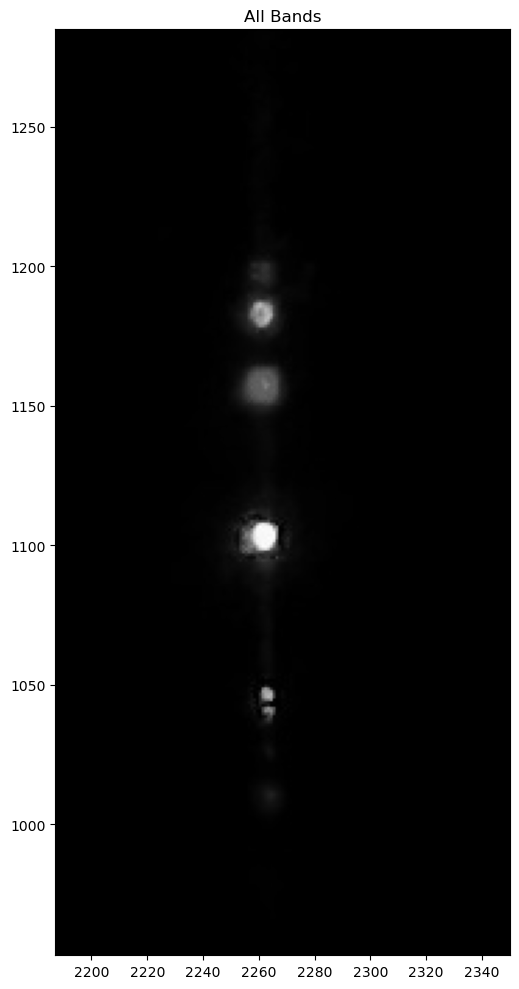

Detected Peaks:
Pixel Position: 1041, Intensity: 451.546142578125
Pixel Position: 1055, Intensity: 1486.1290283203125
Pixel Position: 1080, Intensity: 1318.0294189453125
Pixel Position: 1135, Intensity: 2658.09912109375
Pixel Position: 1192, Intensity: 814.7283325195312
Pixel Position: 1197, Intensity: 632.4246826171875
Pixel Position: 1227, Intensity: 278.00177001953125
7


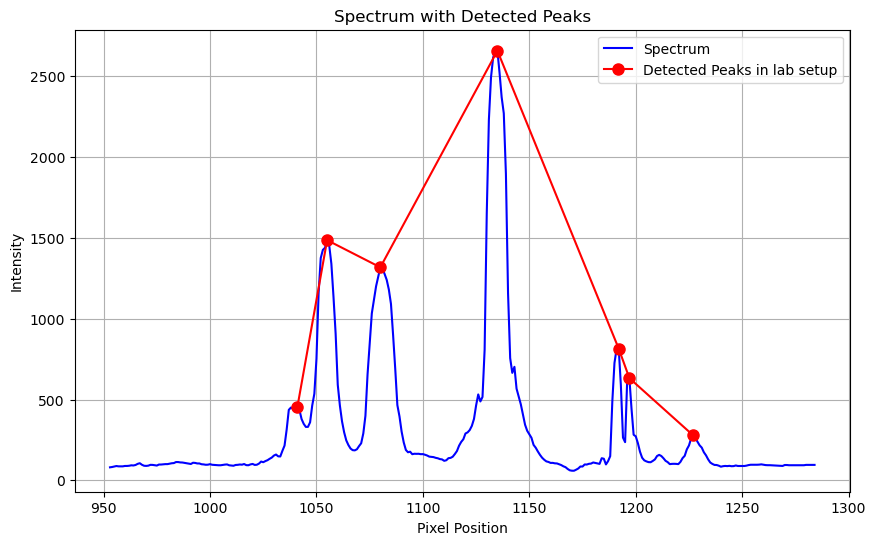

In [6]:
peaks_3 = plot_region_2(region_3, image)


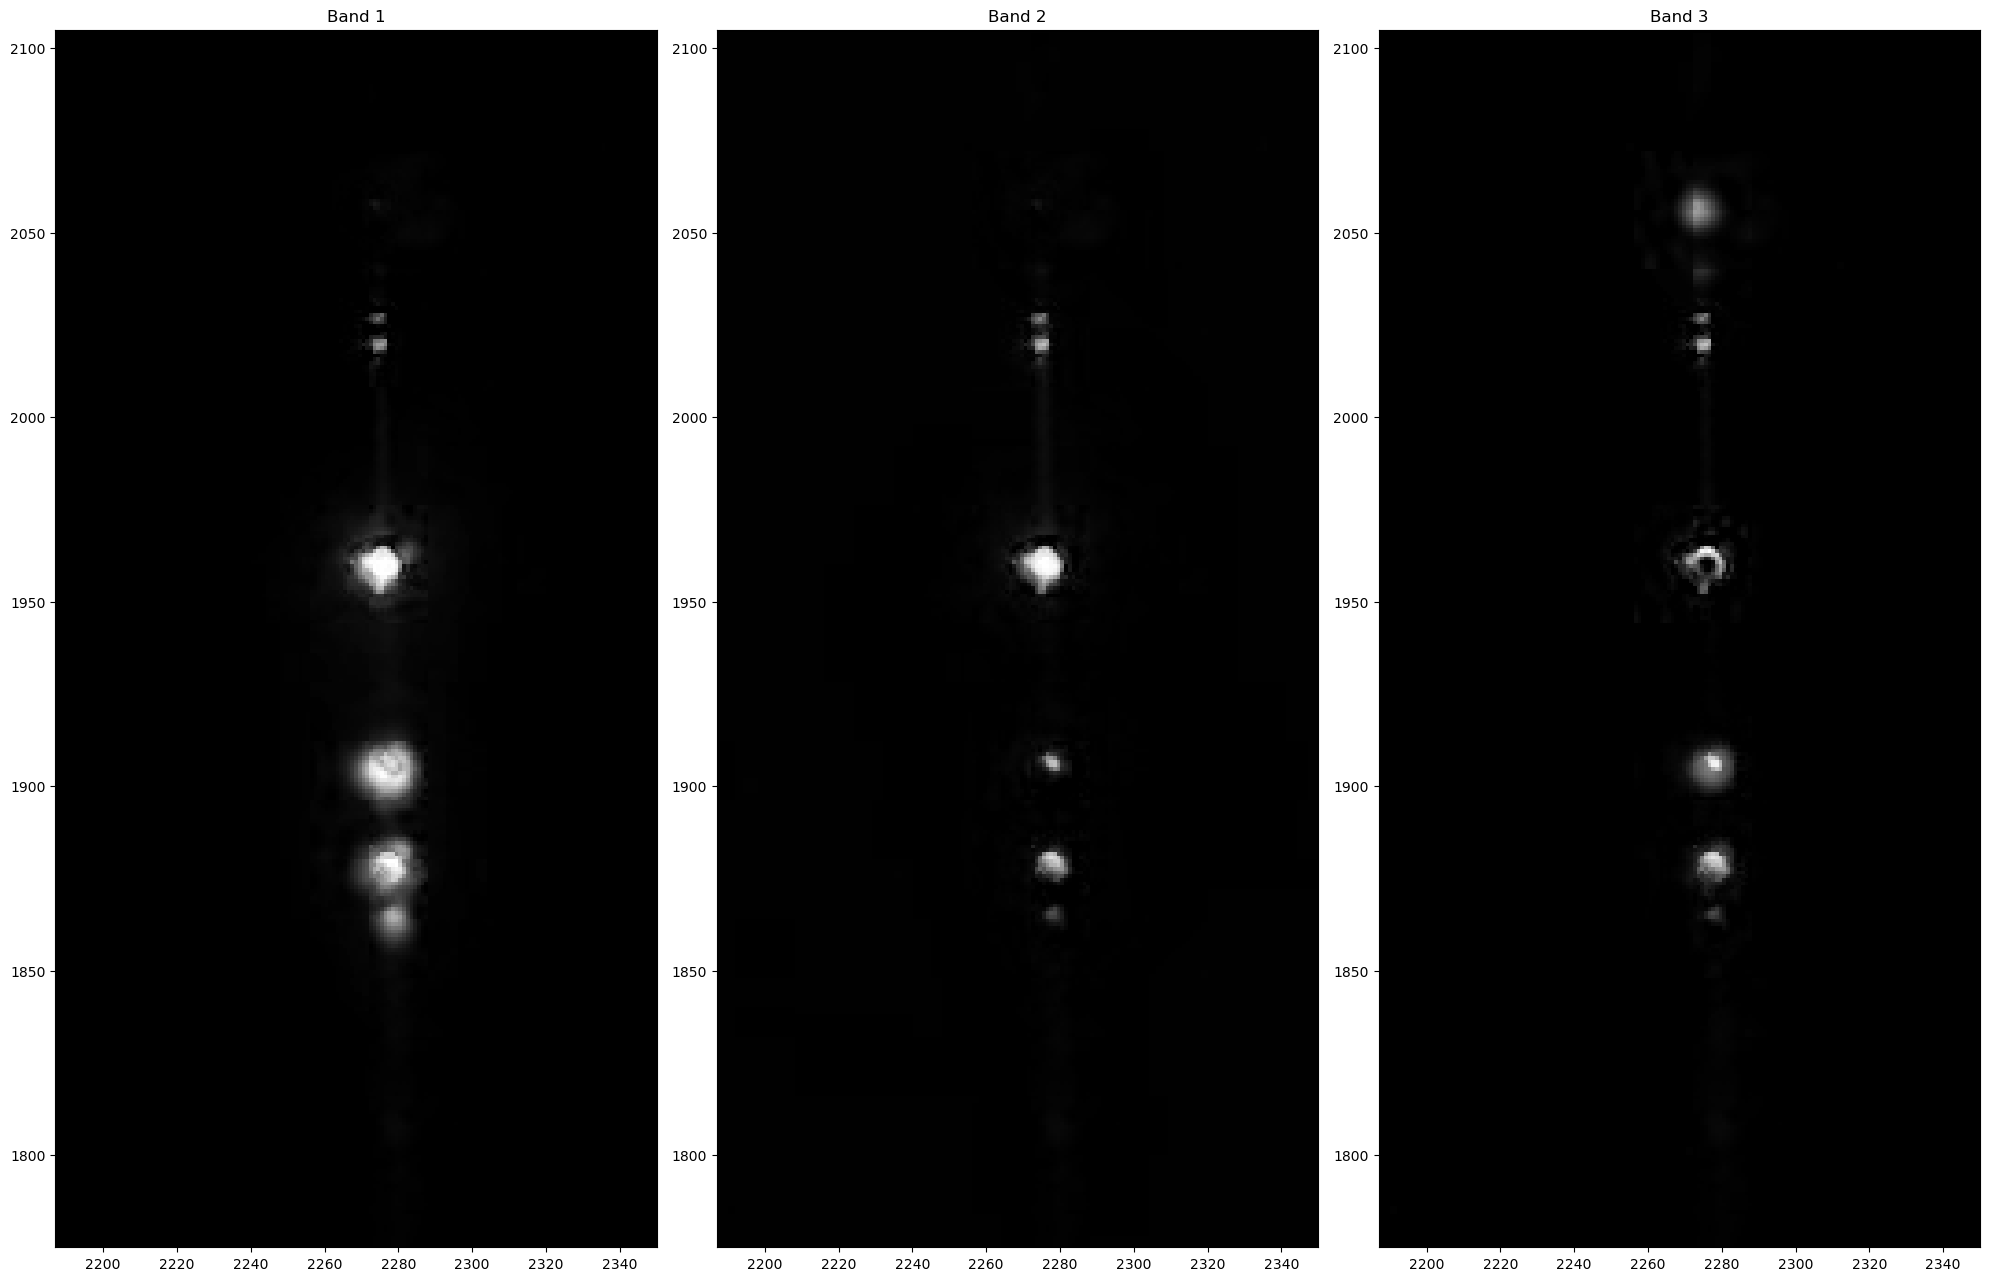

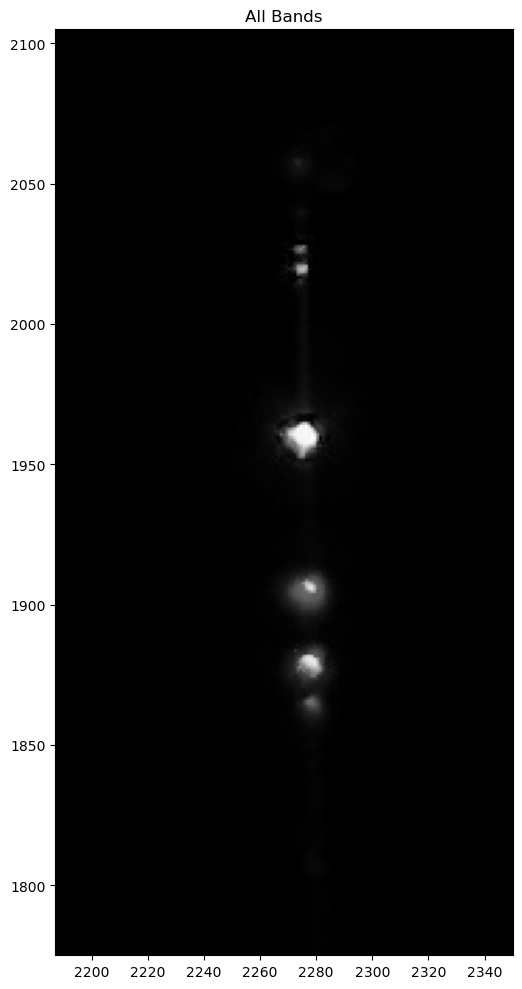

Detected Peaks:
Pixel Position: 1822, Intensity: 303.7593688964844
Pixel Position: 1853, Intensity: 548.974365234375
Pixel Position: 1860, Intensity: 900.8927612304688
Pixel Position: 1911, Intensity: 582.3882446289062
Pixel Position: 1919, Intensity: 2940.620849609375
Pixel Position: 1974, Intensity: 1695.7701416015625
Pixel Position: 2000, Intensity: 1800.027587890625
Pixel Position: 2015, Intensity: 690.6709594726562
8


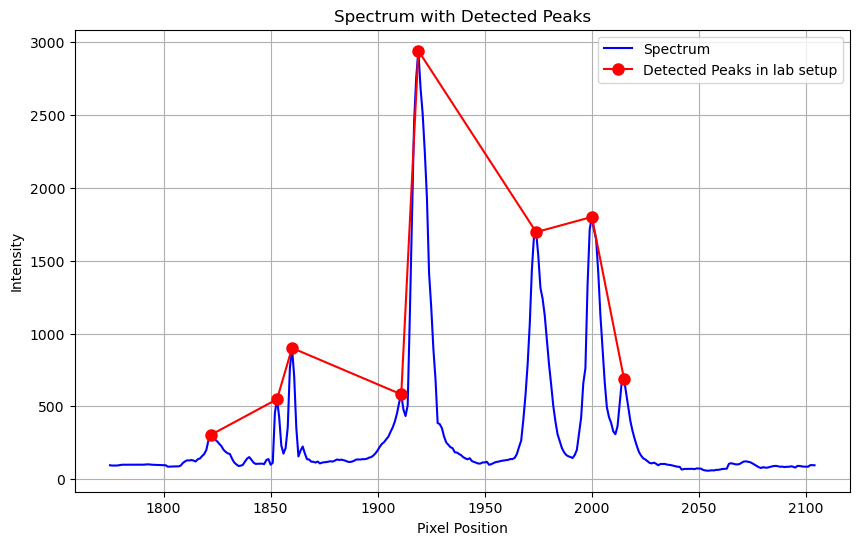

In [7]:
peaks_4 = plot_region_2(region_4, image)

In [8]:
#CALIBRATION

known_wavelengths_He = np.array([447.1, 492.1, 501.5, 587.5, 667.8, 686.7, 706.5])

print(center_y, center_x)
print(central_region)
width = central_region[0] - central_region[1]
height = central_region[2] - central_region[3]

peaks_left = peaks_1[::-1]
peaks_right = peaks_2
peaks_top = peaks_3[::-1]
peaks_bottom = peaks_4

print(peaks_left)
print(peaks_right)
print(peaks_top)
print(peaks_bottom)

1524.1128545317638 2268.051888986148
[2350, 2187, 1607, 1441]
[1963 1932 1925 1866 1811 1785 1770]
[2573 2604 2611 2670 2726 2752 2767]
[1227 1197 1192 1135 1080 1055 1041]
[1822 1853 1860 1911 1919 1974 2000 2015]


In [9]:
#CALIBRATION FINAL
known_wavelengths_He = np.array([447.1, 492.1, 501.5, 587.5, 667.8, 686.7, 706.5])

peaks_left = [1963, 1932, 1925, 1866, 1811, 1785, 1770]
peaks_right = [2573, 2604, 2611, 2670, 2726, 2752, 2767]
peaks_top = [1227, 1197, 1192, 1135, 1080, 1055, 1041]
peaks_bottom = [1822, 1853, 1860, 1919, 1974, 2000, 2015]

print(peaks_left)
print(peaks_right)
print(peaks_top)
print(peaks_bottom)

calibration_left, calibration_right, calibration_top, calibration_bottom = calibrate_peaks_wavelengths(peaks_left, peaks_right, peaks_top, peaks_bottom, known_wavelengths_He)

[1963, 1932, 1925, 1866, 1811, 1785, 1770]
[2573, 2604, 2611, 2670, 2726, 2752, 2767]
[1227, 1197, 1192, 1135, 1080, 1055, 1041]
[1822, 1853, 1860, 1919, 1974, 2000, 2015]

Calibration function for left: y = -0.001x^2 + 3.697x + -1590.054
Calibration function for right: y = -0.001x^2 + 8.786x + -12948.854
Calibration function for top: y = -0.002x^2 + 2.375x + 42.426
Calibration function for bottom: y = -0.001x^2 + 6.565x + -7016.163


Calibration Equation: Wavelength (nm) = -0.001356 * (x)^2 + 3.6975 * x + -1590.0540


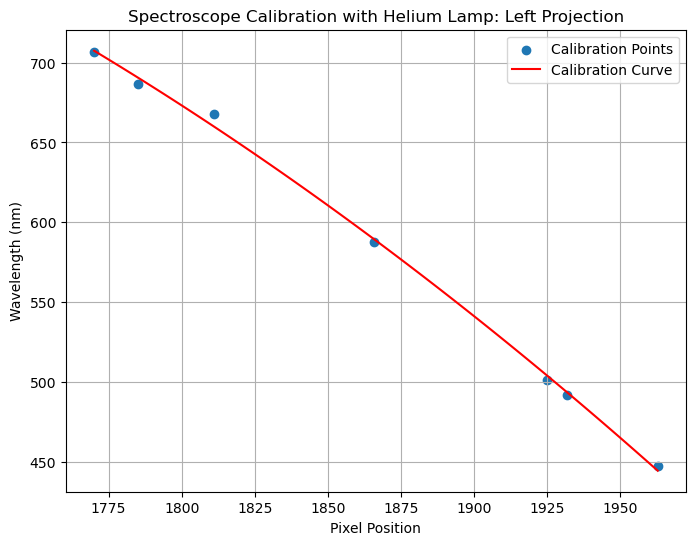

Calibration Equation: Wavelength (nm) = -0.001392 * (x)^2 + 8.7858 * x + -12948.8539


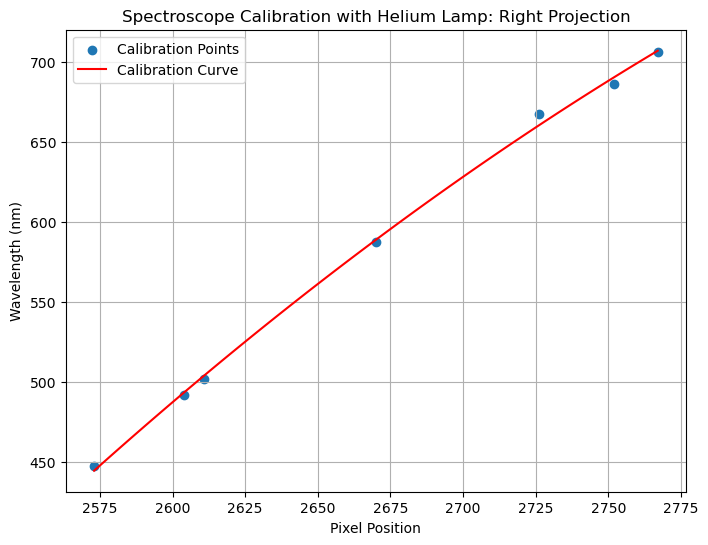

Calibration Equation: Wavelength (nm) = -0.001668 * (x)^2 + 2.3748 * x + 42.4264


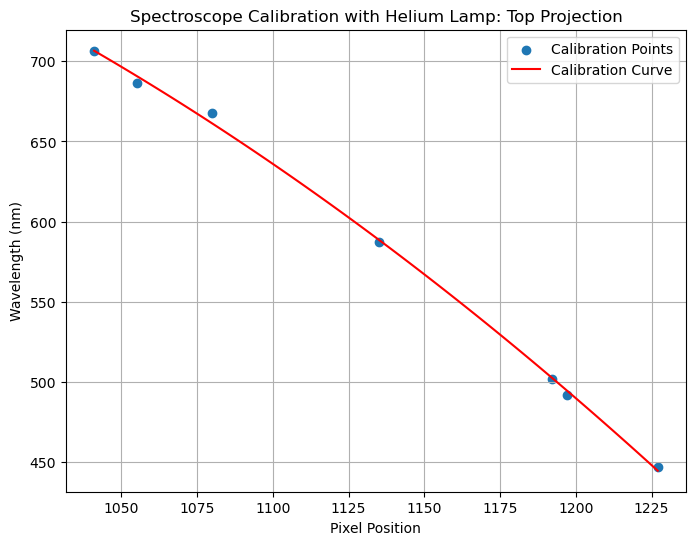

Calibration Equation: Wavelength (nm) = -0.001356 * (x)^2 + 6.5647 * x + -7016.1633


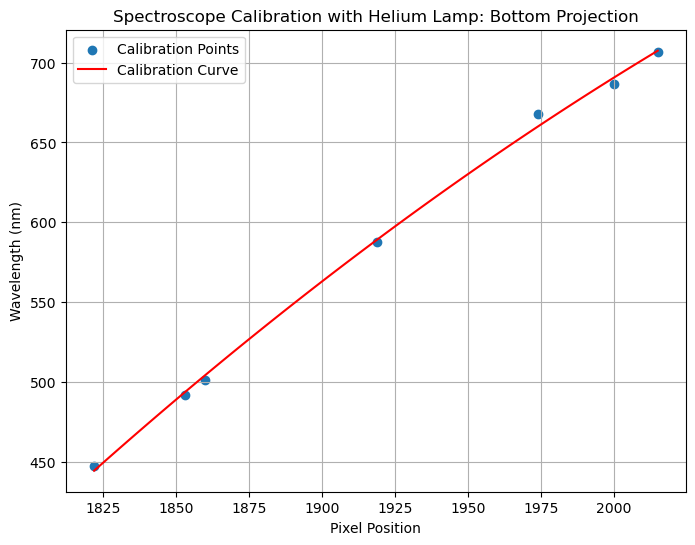

In [10]:
#CALIBRATION CURVE

plot_calibration_curve(calibration_left, peaks_left, known_wavelengths_He, 'Left')
plot_calibration_curve(calibration_right, peaks_right, known_wavelengths_He, 'Right')
plot_calibration_curve(calibration_top, peaks_top, known_wavelengths_He, 'Top')
plot_calibration_curve(calibration_bottom, peaks_bottom, known_wavelengths_He, 'Bottom')

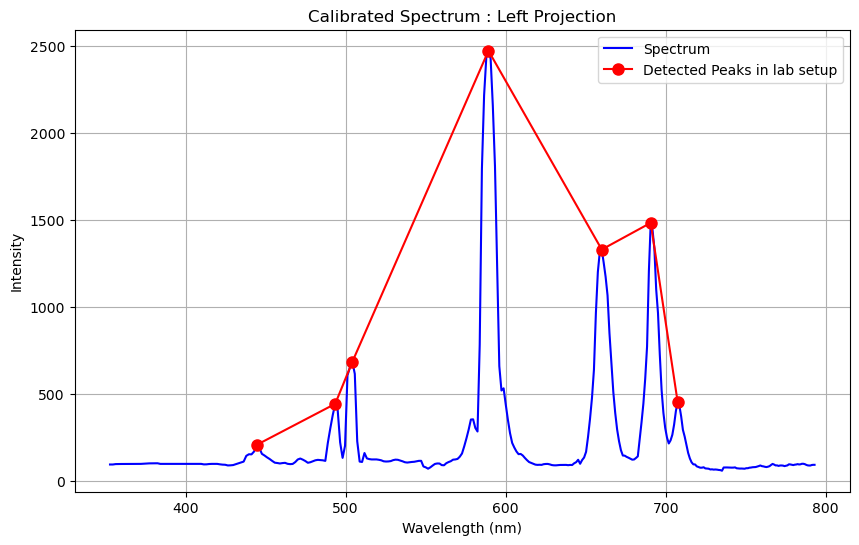

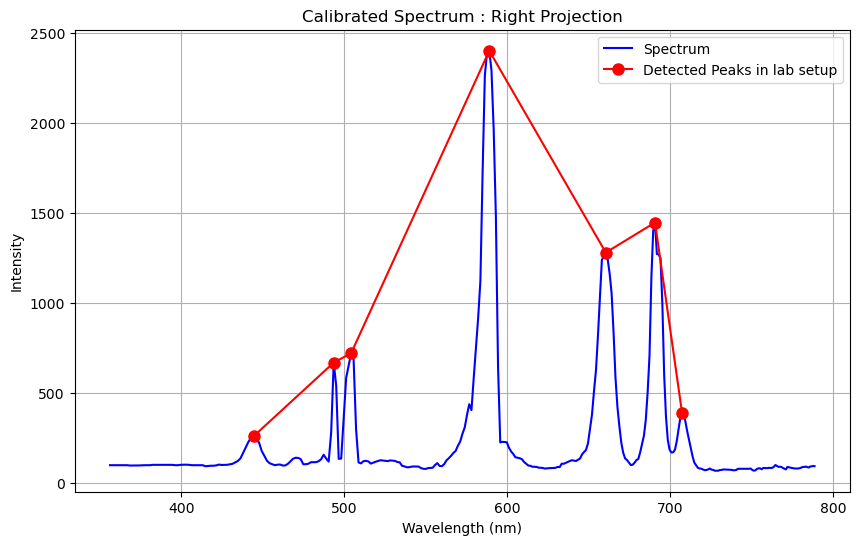

In [11]:
#USING CALIBRATION TO PLOT SPECTRA 1
plot_spectra_1(calibration_left, peaks_left, known_wavelengths_He, region_1, image, 'Left')
plot_spectra_1(calibration_right, peaks_right, known_wavelengths_He, region_2, image, 'Right')

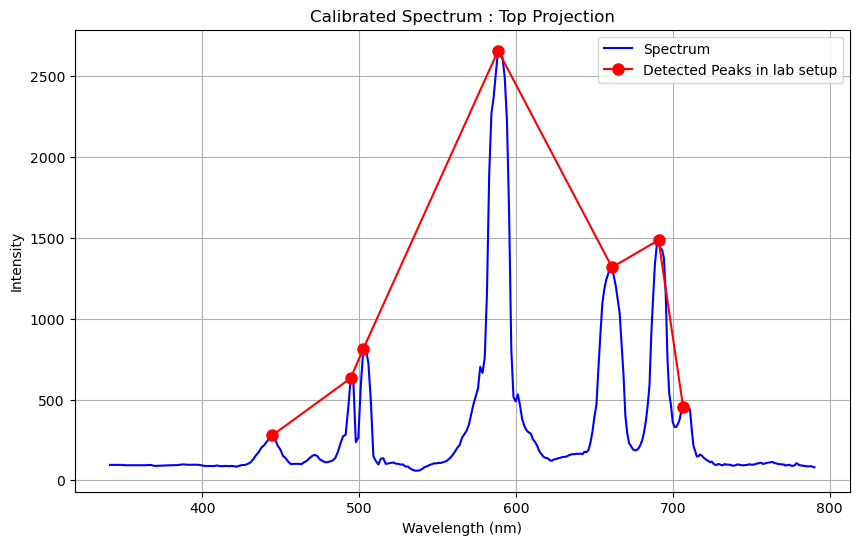

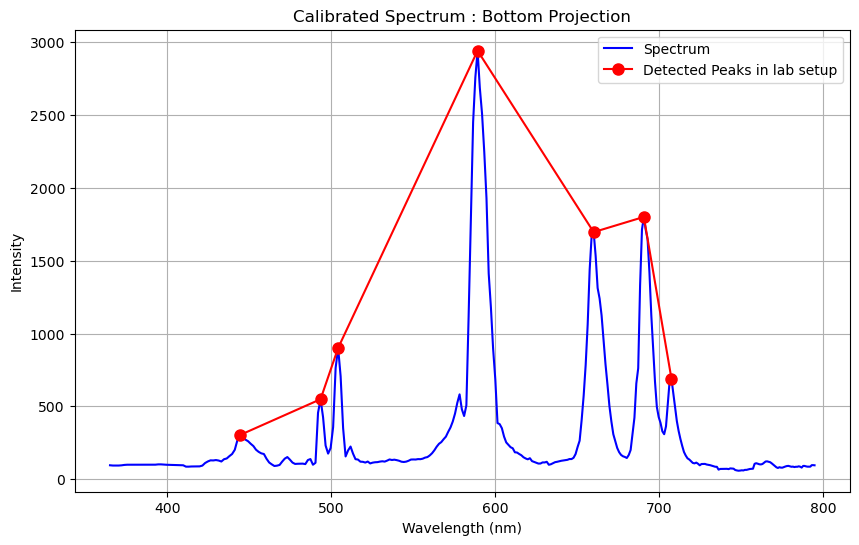

In [12]:
#USING CALIBRATION TO PLOT SPECTRA 2
plot_spectra_2(calibration_top, peaks_top, known_wavelengths_He, region_3, image, 'Top')
plot_spectra_2(calibration_bottom, peaks_bottom, known_wavelengths_He, region_4, image, 'Bottom')

In [13]:
#USING THE CALIBRATION FORMULA TO GENERATE THE SPECTRA CUBE

# Generate the spectra cube
cube, new_wavelengths = spectra_cube(image, central_region, region_1, region_2, region_3, region_4, calibration_left, calibration_right, calibration_top, calibration_bottom)

np.save(f'{path_to_file}/{filename}_cube.npy', cube)


In [ ]:
#Save Calibration Formula as txt

# Create a DataFrame from the calibration variables
df = pd.DataFrame({
    'calibration_left': calibration_left,
    'calibration_right': calibration_right,
    'calibration_top': calibration_top,
    'calibration_bottom': calibration_bottom
})

# Save the DataFrame to a CSV file
df.to_csv('calibrations.csv', index=False)
